In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

# 导入scikit中的函数
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 第1章 引言
机器学习（machine learning）是从数据中提取知识。 它是统计学、人工智能和计算机科学交叉的研究领域，也被称为预测分析（predictive analytics）或统计学习（statistical learning）。



## 1.1 为何选择机器学习
在`智能`应用的早期，许多系统使用人为制订的`if`和`else`决策规则来处理数据， 或根据用户输入的内容进行调整。

想象有一个垃圾邮件过滤器，其任务是酌情将收到的某些邮件移动到垃圾邮件文件夹。你可以创建一个关键词黑名单，所有包含这些关键词的邮件都会被标记为垃圾邮件。这是用专家设计的规则体系来设计`智能`应用的一个示例。人为制订的决策规则对某些应用来说是可行的，但是，人为制订决策规则主要有两个缺点：
+ 做决策所需要的逻辑只适用于单一领域和单项任务。任务哪怕稍有变化，都可能需要重写整个系统
+ 想要制订规则，需要对人类专家的决策过程有很深刻的理解

这种人为制订规则的方法并不适用的一个例子就是图像中的人脸检测。如今，每台智能手机都能够检测到图像中的人脸。但直到2001年，人脸检测问题才得到解决。其主要问题在于，计算机`感知`像素（像素组成了计算机中的图像）的方式与人类感知面部的方式有非常大的不同。正是由于这种表征差异，人类想要制订出一套好的规则来描述数字图像中的人脸构成，基本上是不可能的。

但有了机器学习算法，仅向程序输入海量人脸图像，就足以让算法确定识别人脸需要哪些特征。

### 1.1.1 机器学习能够解决的问题
最成功的机器学习算法是能够将决策过程自动化的那些算法，这些决策过程是从已知示例中泛化得出的。在这种叫作`监督学习`(supervised learning)的方法中，用户将成对的输入和预期输出提供给算法，算法会找到一种方法，根据给定输入给出预期输出。尤其是在没有人类帮助的情况下，给定前所未见的输入，算法也能够给出相应的输出。

从输入/输出对中进行学习的机器学习算法叫作`监督学习算法`（supervised learning algorithm）， 因为每个用于算法学习的样例都对应一个预期输出，好像有一个`老师`在监督着算法。监督学习算法很好理解，其性能也易于测量。

监督学习算法的例子有：

+ 识别信封上手写的邮政编码
+ 基于医学影像判断肿瘤是否为良性
+ 检测信用卡交易中的诈骗行为


另一类算法是`无监督学习算法`(unsupervised learning algorithm)。 在无监督学习中，只有输入数据是已知的，没有为算法提供输出数据。虽然这种算法有许多成功的应用，但理解和评估这些算法往往更加困难。

监督学习算法的例子有：

+ 确定一系列博客文章的主题
+ 将客户分成具有相似偏好的群组
+ 检测网站的异常访问模式

无论是监督学习任务还是无监督学习任务，将输入数据表征为计算机可以理解的形式都是十分重要的。通常来说，将数据想象成表格是很有用的。你想要处理的每一个数据点（每一封电子邮件、每一名客户、每一次交易）对应表格中的一行，描述该数据点的每一项属性（比如客户年龄、交易金额或交易地点）对应表格中的一列。

在机器学习中，表格的每一行被称为一个`样本`（sample）或`数据点`，而每一列则被称为`特征`（feature）。

### 1.1.2 熟悉任务和数据
在机器学习过程中，最重要的部分很可能是理解你正在处理的数据，以及这些数据与你想要解决的任务之间的关系。每一种算法的输入数据类型和最适合解决的问题都是不一样的。在构建机器学习解决方案的过程中，你应该给出下列问题的答案，或者至少要将这些问题记在脑中：

- 我想要回答的问题是什么？已经收集到的数据能够回答这个问题吗？
- 要将我的问题表示成机器学习问题，用哪种方法最好？
- 我收集的数据是否足够表达我想要解决的问题？
- 我提取了数据的哪些特征？这些特征能否实现正确的预测？
- 如何衡量应用是否成功？
- 机器学习解决方案与我的研究或商业产品中的其他部分是如何相互影响的？

从更大的层面来看，机器学习算法和方法只是解决特定问题的过程中的一部分，一定要始终牢记整个项目的大局。许多人浪费大量时间构建复杂的机器学习解决方案，最终却发现没有解决正确的问题。

## 1.2 为何选择Python
[skip]

## 1.3 scikit-learn
[skip]

## 1.4 必要的库和工具
[skip]

## 1.5 Python 2与Python 3的对比
[skip]

## 1.6 本书用到的版本
[skip]

## 1.7 第一个应用：鸢尾花分类
植物学爱好者收集了鸢尾花的一些测量数据：花瓣的长度和宽度以及花萼的长度和宽度，所有测量结果的单位都是厘米（见下图）：
<img src="images/01_02_01.png" width="400">

<img src="images/01_02_02.png" width="400">

这些测量数据已经被植物学专家鉴定为属于`setosa`、`versicolor`或`virginica`三个品种之一。

我们的目标是构建一个机器学习模型，可以从这些已知品种的鸢尾花测量数据中进行学习，从而能够预测新鸢尾花的品种。因为我们有已知品种的鸢尾花的测量数据，所以这是一个`监督学习`问题。我们要在多个选项中预测其中一个，因此这是一个`分类`问题的示例。数据集中的每朵鸢尾花都属于三个类别之一，所以这是一个`三分类`问题。

单个数据点的预期输出是这朵花的品种。对于一个数据点来说，它的品种叫作`标签`（label）。

### 1.7.1 初识数据
我们可以调用`load_iris`函数来加载数据。`load_iris`返回一个`Bunch`对象，与字典非常相似，里面包含键和值：

In [2]:
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# DESCR键对应的值是数据集的简要说明
print(iris_dataset['DESCR'][:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


In [4]:
# target_names键对应的值是一个字符串数组，里面包含我们要预测的花的品种
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# feature_names键对应的值是一个字符串列表，对每一个特征进行了说明
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# data里面是花萼长度、花萼宽度、花瓣长度、花瓣宽度的测量数据，格式为NumPy数组
type(iris_dataset['data']), iris_dataset['data'].shape

(numpy.ndarray, (150, 4))

In [7]:
# target数组包含的是测量过的每朵花的品种(品种被转换成从0到2的整数)，也是一个NumPy数组
# 0代表setosa，1代表versicolor, 2 代表virginica
# 数字的代表含义由iris['target_names']数组
type(iris_dataset['target']), iris_dataset['target'].shape

(numpy.ndarray, (150,))

In [8]:
# 前5个样本的特征数值
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 1.7.2 衡量模型是否成功：训练数据与测试数据
我们不能将用于构建模型的数据用于评估模型，模型对于训练集中的任何数据点总会预测正确的标签。这种`记忆`无法告诉我们模型的`泛化`(generalize)能力如何(换句话说，在新数据上能否正确预测)。

我们要用新数据来评估模型的性能。通常的做法是将收集好的带标签数据分成两部分。一部分数据用于构建机器学习模型，叫作`训练数据`或`训练集`。其余的数据用来评估模型性能，叫作`测试数据`、`测试集`或`留出集`。

`scikit-learn`中的`train_test_split`函数可以打乱数据集并进行拆分(通常75%用于训练、25%用于测试)。`scikit-learn`中的数据通常用大写的$X$表示，而标签用小写的$y$表示。在对数据进行拆分之前，`train_test_split`函数利用伪随机数生成器将数据集打乱。否则的话，如果我们只是将最后25%的数据作为测试集，那么所有数据点的标签都是2。

为了确保多次运行同一函数能够得到相同的输出，我们利用`random_state`参数指定了随机数生成器的种子：

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
print("X_train's shape: ", X_train.shape)
print("y_train's shape: ", y_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (112, 4)
y_train's shape:  (112,)
X_test's shape:  (38, 4)
y_test's shape:  (38,)


### 1.7.3 要事第一：观察数据
在构建机器学习模型之前，通常最好检查一下数据，看看如果不用机器学习能不能轻松完成任务，或者需要的信息有没有包含在数据中。

此外，检查数据也是发现异常值和特殊值的好方法。举个例子，可能有些鸢尾花的测量单位是英寸而不是厘米。

我们首先绘制Iris数据集的散点图矩阵，按类别标签着色：

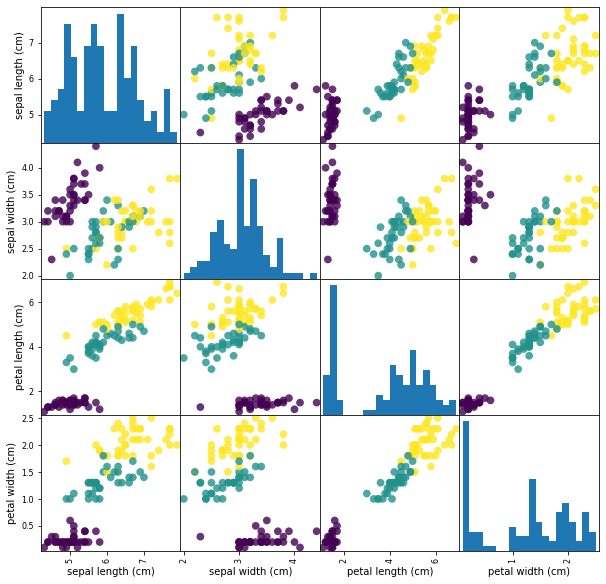

In [10]:
# 利用X_train中的数据创建DataFrame 
# 利用iris_dataset.feature_names中的字符串对数据列进行标记
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# 利用DataFrame创建散点图矩阵，按y_train着色 
grr = pd.plotting.scatter_matrix(iris_dataframe, 
                        c=y_train, 
                        figsize=(10, 10), 
                        marker='o', 
                        hist_kwds={'bins': 20}, 
                        s=60, 
                        alpha=.8, 
                        cmap=None) # 原书：cmap=mglearn.cm3
plt.show()

从图中可以看出，利用花瓣和花萼的测量数据基本可以将三个类别区分开。这说明机器学习模型很可能可以学会区分它们。

### 构建第一个模型：kNN算法
`scikit-learn`中所有的机器学习模型都在各自的类中实现，这些类被称为`Estimator`类。

kNN分类器是一个很容易理解的算法。构建此模型只需要保存训练集即可。要对一个新的数据点做出预测，算法会在训练集中寻找与这个新数据点距离最近的数据点，然后将找到的数据点的标签赋值给这个新数据点。

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 做出预测
假设我们在野外发现了一朵鸢尾花，花萼长5cm、宽2.9cm，花瓣长1cm、宽0.2cm：

In [12]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
prediction, iris_dataset['target_names'][prediction]

(array([0]), array(['setosa'], dtype='<U10'))

### 1.7.6 评估模型
我们可以对测试数据中的每朵鸢尾花进行预测，并将预测结果与标签(已知的品种)进行对比。我们可以通过计算`精度(accuracy)`来衡量模型的优劣，精度就是品种预测正确的花所占的比例：

In [13]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.9736842105263158

In [14]:
# 也可以使用kNN对象的score方法来计算测试集的精度
knn.score(X_test, y_test)

0.9736842105263158